In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# load dataset
demo = pd.read_csv("NData.csv")
feature_cols = ['N']
X = demo[feature_cols] 
y = demo.N_Level

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tree = DecisionTreeClassifier(criterion="entropy")
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [5]:
new_input = [[150.44]]
new_output = tree.predict(new_input)
print(new_input, new_output)

[[150.44]] ['L']


In [6]:
print(demo.groupby('N_Level').size())

N_Level
H      12
L    1310
M     234
dtype: int64


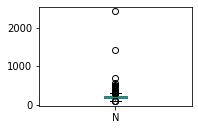

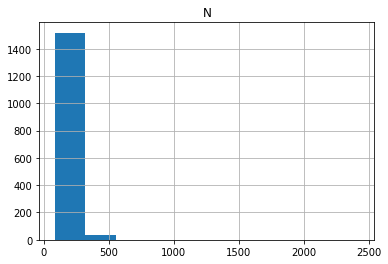

In [7]:
# box and whisker plots
demo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
demo.hist()
plt.show()


[Text(111.6, 453.0, 'X[0] <= 239.89\nentropy = 0.72\nsamples = 933\nvalue = [9, 771, 153]'),
 Text(55.8, 271.8, 'entropy = 0.0\nsamples = 771\nvalue = [0, 771, 0]'),
 Text(167.39999999999998, 271.8, 'X[0] <= 465.5\nentropy = 0.31\nsamples = 162\nvalue = [9, 0, 153]'),
 Text(111.6, 90.59999999999997, 'entropy = 0.0\nsamples = 153\nvalue = [0, 0, 153]'),
 Text(223.2, 90.59999999999997, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0]')]

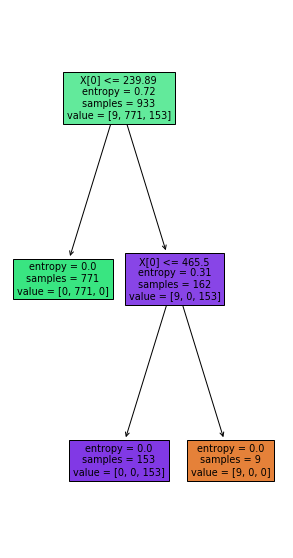

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
data = pd.read_csv("NData.csv")
feature_cols = ['N']
X = data[feature_cols] 
y = data.N_Level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
plt.figure(figsize=(5,10))
tree.plot_tree(tr,filled=True)

In [10]:
print(tree.export_text(tr))

|--- feature_0 <= 239.89
|   |--- class: L
|--- feature_0 >  239.89
|   |--- feature_0 <= 465.50
|   |   |--- class: M
|   |--- feature_0 >  465.50
|   |   |--- class: H



In [11]:
import pickle
pickle.dump(tr, open('Npredict.pkl', 'wb'))